# Gradient Boosting
This notebook demonstrates Gradient Boosting using scikit-learn's GradientBoostingClassifier.

## Import Required Libraries
We will use numpy, pandas, matplotlib, and scikit-learn.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset
We use the Boston housing dataset for regression.

In [21]:
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gradient Boosting with scikit-learn

### fit model

In [22]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

### compute accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9444


In [24]:
report = classification_report(y_test, y_pred, target_names=wine.target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



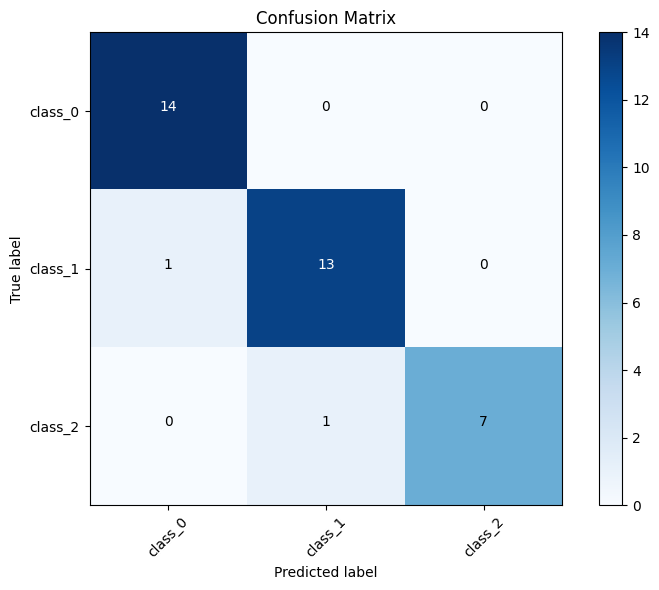

In [25]:
cm = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix with numbers
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(wine.target_names))
plt.xticks(tick_marks, wine.target_names, rotation=45)
plt.yticks(tick_marks, wine.target_names) 
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()  


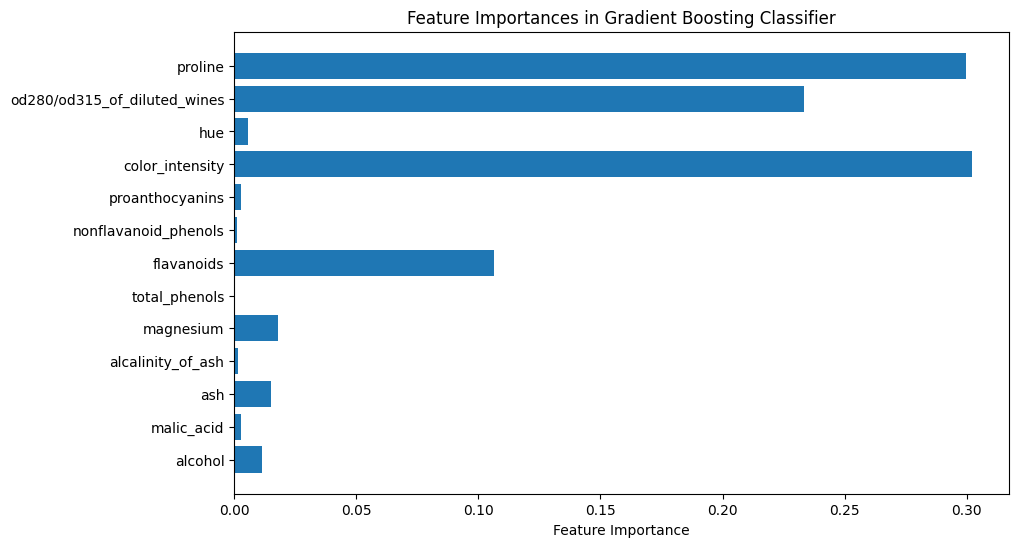

In [26]:
feature_importances = gb_clf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(wine.feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.show()

## Analysis and Discussion
The GradientBoostingClassifier performed well on the Wine dataset, achieving a high accuracy score, which suggests that the model is effective in distinguishing between the different classes of wine based on their features. The classification report further supports this, showing strong precision, recall, and F1-scores across all three classes. Overall, the GradientBoostingClassifier appears to be a robust model for this classification task, with opportunities for further refinement through hyperparameter tuning or feature engineering to address the minor misclassifications observed.